# Project 4: Transformations

[https://github.com/meterglost/HCMUT-CO3057-DigitalImageProcessing-ComputerVision](https://github.com/meterglost/HCMUT-CO3057-DigitalImageProcessing-ComputerVision/tree/main/project/project4.ipynb)

## Setup

In [2]:
%pip install --quiet opencv-python-headless numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import numpy as np
from IPython.display import display, Image

## Sample image

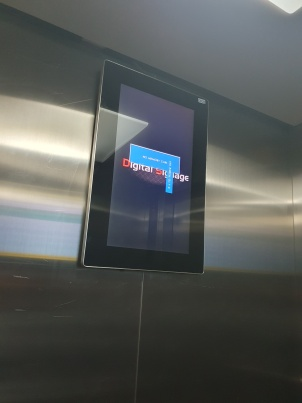

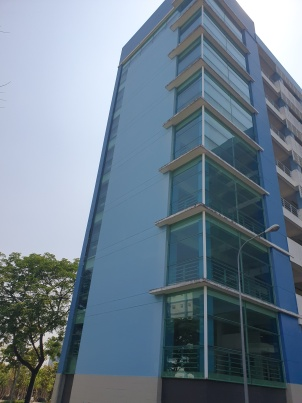

In [4]:
img1 = cv.imread("../sample/20240409_094733.jpg")
img1 = cv.resize(img1, (img1.shape[1]//10, img1.shape[0]//10), interpolation=cv.INTER_AREA)

img2 = cv.imread("../sample/20240409_095536.jpg")
img2 = cv.resize(img2, (img2.shape[1]//10, img2.shape[0]//10), interpolation=cv.INTER_AREA)

display(
    Image(cv.imencode(".jpg", img1)[1].tobytes()),
    Image(cv.imencode(".jpg", img2)[1].tobytes()),
)

## Affine transformation

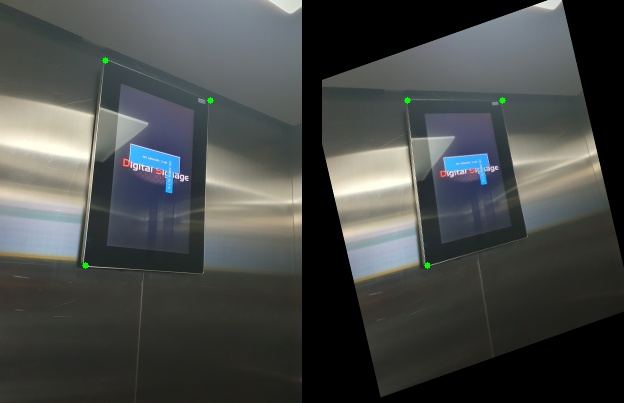

In [32]:
img1_src_pts = np.float32([[105,60], [210,100], [ 85,265]])
img1_dst_pts = np.float32([[85,100], [180,100], [105,265]])

img1_src = img1.copy()
for pt in img1_src_pts:
    cv.circle(img1_src, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img1_src)[1].tobytes()))

img1_warp_matrix = cv.getAffineTransform(img1_src_pts, img1_dst_pts)

img1_dst = cv.warpAffine(img1, img1_warp_matrix, (img1.shape[1], img1.shape[0]))
for pt in img1_dst_pts:
    cv.circle(img1_dst, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img1_dst)[1].tobytes()))

gap = np.zeros(shape=(img1.shape[0], 20, 3))

display(Image(cv.imencode(".jpg", np.hstack([img1_src, gap, img1_dst]))[1].tobytes()))

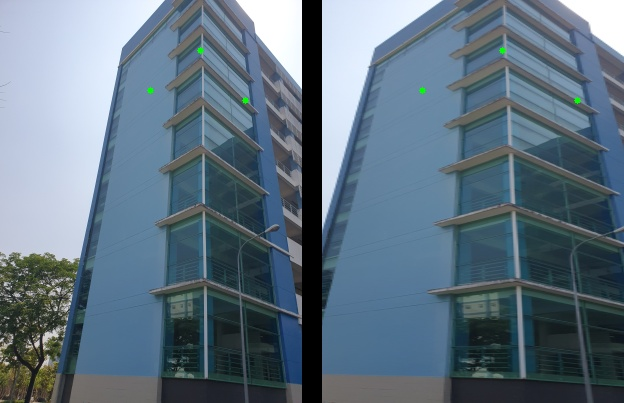

In [144]:
img2_src_pts = np.float32([[200, 50], [245, 100], [150, 90]])
img2_dst_pts = np.float32([[180, 50], [255, 100], [100, 90]])

img2_src = img2.copy()
for pt in img2_src_pts:
    cv.circle(img2_src, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img2_src)[1].tobytes()))

img2_warp_matrix = cv.getAffineTransform(img2_src_pts, img2_dst_pts)

img2_dst = cv.warpAffine(img2, img2_warp_matrix, (img2.shape[1], img2.shape[0]))
for pt in img2_dst_pts:
    cv.circle(img2_dst, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img2_dst)[1].tobytes()))

gap = np.zeros(shape=(img2.shape[0], 20, 3))

display(Image(cv.imencode(".jpg", np.hstack([img2_src, gap, img2_dst]))[1].tobytes()))

## Perspective transformation

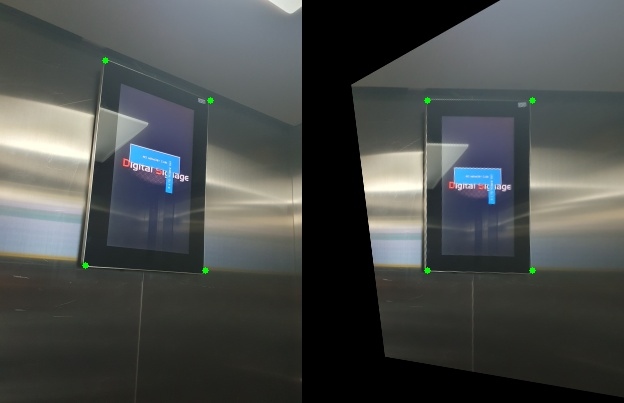

In [34]:
img1_src_pts = np.float32([[105, 60], [210,100], [205,270], [ 85,265]])
img1_dst_pts = np.float32([[105,100], [210,100], [210,270], [105,270]])

img1_src = img1.copy()
for pt in img1_src_pts:
    cv.circle(img1_src, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img1_src)[1].tobytes()))

img1_warp_matrix = cv.getPerspectiveTransform(img1_src_pts, img1_dst_pts)

img1_dst = cv.warpPerspective(img1, img1_warp_matrix, (img1.shape[1], img1.shape[0]))
for pt in img1_dst_pts:
    cv.circle(img1_dst, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img1_dst)[1].tobytes()))

gap = np.zeros(shape=(img1.shape[0], 20, 3))

display(Image(cv.imencode(".jpg", np.hstack([img1_src, gap, img1_dst]))[1].tobytes()))

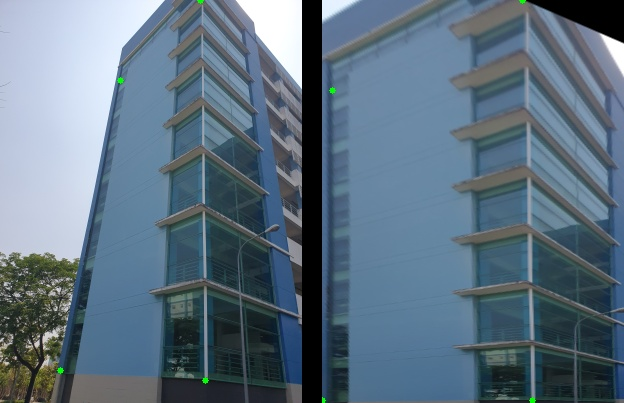

In [142]:
img2_src_pts = np.float32([[200,0], [205,380], [ 60,370], [120, 80]])
img2_dst_pts = np.float32([[200,0], [210,400], [  0,400], [ 10, 90]])

img2_src = img2.copy()
for pt in img2_src_pts:
    cv.circle(img2_src, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img2_src)[1].tobytes()))

img2_warp_matrix = cv.getPerspectiveTransform(img2_src_pts, img2_dst_pts)

img2_dst = cv.warpPerspective(img2, img2_warp_matrix, (img2.shape[1], img2.shape[0]))
for pt in img2_dst_pts:
    cv.circle(img2_dst, np.int32(tuple(pt)), 3, (0, 255, 0), -1)

# display(Image(cv.imencode(".jpg", img2_dst)[1].tobytes()))

gap = np.zeros(shape=(img2.shape[0], 20, 3))

display(Image(cv.imencode(".jpg", np.hstack([img2_src, gap, img2_dst]))[1].tobytes()))

## Conclusion

Since the affine transformation is a special case of the projective transformation that preserves parallelism, it is not useful in real case photos.